# 图网络的基本操作
这一部分我们将介绍两个包，[NetworkX](https://networkx.org/documentation/stable/) 和[PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/).

## NetworkX Tutorial
NetworkX 是最常用于创建、操作和挖掘图形的 Python 包之一。这一节的主要内容来自[colab教程](https://colab.research.google.com/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/libraries/NetworkX.ipynb#scrollTo=zA1OO6huHeV6)

### 设置

In [1]:
# 导入所需要的包
import networkx as nx

### 图(graph)
NetworkX 提供了几个类来存储不同类型的图，例如有向图(directed graph)和无向图(undirected graph)。它还提供了创建多重图（multigraphs,有向和无向）的类。

更详细的信息请看参考[NetworkX graph types](https://networkx.org/documentation/stable/reference/classes/index.html).

In [2]:
# 创建一个无向图G
G = nx.Graph()
print(G.is_directed())

# 创建一个有向图 H
H = nx.DiGraph()
print(H.is_directed())

# 添加一个图级别的属性
G.graph["name"] = "Bar"
print(G.graph)

False
True
{'name': 'Bar'}


### Node(节点)
节点（带有属性）可以很容易地添加到 NetworkX 图中。

In [3]:
# 添加一个节点带有节点级别的属性
G.add_node(0, feature=0, label=0)

# 得到节点为0的属性
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

Node 0 has the attributes {'feature': 0, 'label': 0}


In [4]:
# 添加多个带有属性的节点
G.add_nodes_from([
    (1, {"feature": 1, "label": 1},),
    (2, {"feature": 2, "label": 2})
])

# 遍历所有的节点
# Set data=True将返回节点属性
for node in G.nodes(data=True):
    print(node)

# 得到节点数
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

(0, {'feature': 0, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 3 nodes


### 边(edge)
与节点类似，边（带有属性）也可以很容易地添加到 NetworkX 图中。

In [5]:
# 添加一个边带有权重0.5
G.add_edge(0, 1, weight=0.5)

# 得到边(0, 1)的属性
edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attribution {}".format(edge_0_1_attr))

Edge (0, 1) has the attribution {'weight': 0.5}


In [6]:
# 添加多条边的权重
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1})
])

# 循环遍历所有的边缘
# 这里没有data=True，所以只返回边缘
for edge in G.edges():
  print(edge)

# 得到边数
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))


(0, 1)
(0, 2)
(1, 2)
G has 3 edges


### 可视化(Visualization)

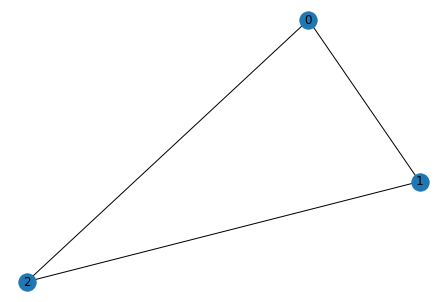

In [7]:
# 画出图
nx.draw(G, with_labels = True)

### 节点度和邻居

In [8]:
node_id = 1

# 节点1的度
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# 得到节点1的邻居节点
for neighbor in G.neighbors(node_id):
    print("Node {} has neighbor {}".format(node_id, neighbor))

Node 1 has degree 2
Node 1 has neighbor 0
Node 1 has neighbor 2


### 其他功能
NetworkX 还提供了大量有用的方法来研究图形。
这是一个获取节点的[PageRank](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank)的示例

{0: 0.17857162031103999,
 1: 0.32142837968896,
 2: 0.32142837968896,
 3: 0.17857162031103999}

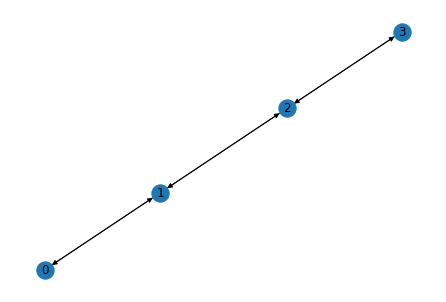

In [9]:
num_nodes = 4
# 创建一个新的路径像图，并改变它为一个有向图形
G = nx.DiGraph(nx.path_graph(num_nodes))
nx.draw(G, with_labels = True)

pr = nx.pagerank(G, alpha=0.8)
pr